In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import json
from scipy.sparse import hstack
from pprint import pprint
import random
import numpy as np

In [2]:
root_dir = Path().resolve()
models_dir = root_dir / "models"
data_dir = root_dir / "data"

word_vectorizer_pkl = models_dir / "final_models" / "word_vectorizer.pkl"
char_vectorizer_pkl = models_dir / "final_models" / "char_vectorizer.pkl"
svm_model_pkl = models_dir / "final_models" / "svm_model.pkl"

# Test files exist
assert word_vectorizer_pkl.exists(), f"File not found: {word_vectorizer_pkl}"
assert char_vectorizer_pkl.exists(), f"File not found: {char_vectorizer_pkl}"
assert svm_model_pkl.exists(), f"File not found: {svm_model_pkl}"

In [3]:
with open(word_vectorizer_pkl, "rb") as f:
  word_vectorizer = pickle.load(f)

with open(char_vectorizer_pkl, "rb") as f:
  char_vectorizer = pickle.load(f)

with open(svm_model_pkl, "rb") as f:
  svm_model = pickle.load(f)

# Confirm models loaded successfully
print("Models loaded successfully:")
print(f"- Word Vectorizer: {type(word_vectorizer).__name__}")
print(f"- Char Vectorizer: {type(char_vectorizer).__name__}")
print(f"- SVM Model: {type(svm_model).__name__}")

Models loaded successfully:
- Word Vectorizer: TfidfVectorizer
- Char Vectorizer: TfidfVectorizer
- SVM Model: SVC


c:\Users\aliev\miniconda3\envs\SDP\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\aliev\miniconda3\envs\SDP\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\aliev\miniconda3\envs\SDP\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.1 when using version 1.7.1. This 

In [9]:
word_vectorizer.vocabulary_

{'həzm': np.int64(7573),
 'sisteminin': np.int64(15147),
 'fəal': np.int64(6185),
 'olması': np.int64(12390),
 'bədənin': np.int64(3542),
 'saglamlıgı': np.int64(14636),
 'ucun': np.int64(17046),
 'muhum': np.int64(10661),
 'cunki': np.int64(4005),
 'bədənə': np.int64(3546),
 'daxil': np.int64(4463),
 'olan': np.int64(12158),
 'və': np.int64(17789),
 'həmcinin': np.int64(7384),
 'olunmamıs': np.int64(12488),
 'qidalar': np.int64(13748),
 'bu': np.int64(3210),
 'yolla': np.int64(19122),
 'yardım': np.int64(18692),
 'edən': np.int64(5492),
 '5': np.int64(564),
 '1': np.int64(35),
 'alma': np.int64(1135),
 'sirkəsi': np.int64(15109),
 'faydalı': np.int64(5986),
 'sousunda': np.int64(15333),
 'istifadə': np.int64(8644),
 'edə': np.int64(5451),
 'bilərsiniz': np.int64(2867),
 'sirkə': np.int64(15108),
 'edər': np.int64(5511),
 'da': np.int64(4230),
 'rahat': np.int64(14188),
 'olmasına': np.int64(12399),
 'mədə': np.int64(10975),
 'immun': np.int64(8173),
 'sistemini': np.int64(15145),
 '2'

In [10]:
char_vectorizer.vocabulary_

{'həz': np.int64(11085),
 'əzm': np.int64(29982),
 'zm ': np.int64(26600),
 'm s': np.int64(15596),
 ' si': np.int64(2688),
 'sis': np.int64(22118),
 'ist': np.int64(13068),
 'ste': np.int64(22408),
 'tem': np.int64(23169),
 'emi': np.int64(9727),
 'min': np.int64(15938),
 'ini': np.int64(12472),
 'nin': np.int64(17792),
 'in ': np.int64(12259),
 'n f': np.int64(16752),
 ' fə': np.int64(1103),
 'fəa': np.int64(10376),
 'əal': np.int64(28195),
 'al ': np.int64(5433),
 'l o': np.int64(14121),
 ' ol': np.int64(2157),
 'olm': np.int64(18687),
 'lma': np.int64(14877),
 'mas': np.int64(15770),
 'ası': np.int64(6640),
 'sı ': np.int64(22583),
 'ı b': np.int64(26744),
 ' bə': np.int64(593),
 'bəd': np.int64(7746),
 'ədə': np.int64(28363),
 'dən': np.int64(9367),
 'əni': np.int64(29029),
 'n s': np.int64(17037),
 ' sa': np.int64(2613),
 'sag': np.int64(21746),
 'agl': np.int64(5235),
 'gla': np.int64(10484),
 'lam': np.int64(14237),
 'aml': np.int64(5709),
 'mlı': np.int64(16043),
 'lıg': np.in

In [4]:
dataset_path = data_dir / "combined" / "combined_dataset_clean.json"
with open(dataset_path, "r", encoding="utf-8") as f:
    dataset = json.load(f)

len(dataset)

10000

In [10]:
humans_samples = [sample['content'] for sample in dataset if sample['label'] == 'human']
ai_samples = [sample['content'] for sample in dataset if sample['label'] == 'ai']

In [9]:
ai_text_sample = random.choice(ai_samples)
human_text_sample = random.choice(humans_samples)
  
print("AI-generated text sample:")
print(ai_text_sample)
print("\nHuman-written text sample:")
print(human_text_sample)

AI-generated text sample:
Başlıq: Tarixi dəyişdirəcək kəşf - 558 milyon illik sir Rusiyanın şimali-qərbindəki Ağ dəniz sahillərində 558 milyon illik skelet tapıldı! Bu müdrik alimlər skeletdə xolesterol molekullarını aşkar etdilər və bu kəşf tarixi dəyişdirə bilər. Avstraliya Milli Universitetindən alimlər, "Dickinsonia" adlı sümüyün bir heyvana aid olduğunu ortaya çıxardılar. Bu, ən qədim heyvan skeleti olaraq tarixə keçir və çoxhüceyrəli sadə həyat formalarının planetimizə yayılmağa başladığı dövrdə yaşadığı düşünülür. Alim Con Broks:"Tapdığımız yağ molekulları bu heyvanların 558 milyon il əvvəl yaşadığını sübut edir" deyib. Bu müdrik kəşflər, əvvəl qalıqların göbələyə və ya böyük bir amyöbə aid olduğu düşünülən Dickinsonia'nın bir heyvana aid olduğunu sübut edir. Elmi dünyanın bu kəşfinə inanmayanlar isə şaşırdılar! Tarixi dəyişdirən bu kəşf, bir dövrə işıq tutur və elm adamlarının əvvəllər anlamağa çalışdığı məsələləri açığa çıxarır. Bu, dəhşətli bir keşfi təbrik edir və dəhşətli b

In [28]:
with open("ai_to_human.txt", "r", encoding="utf-8") as f:
    ai_text_humanized = f.readline().strip()
  
with open("human_to_ai.txt", "r", encoding="utf-8") as f:
    human_text_ai = f.readline().strip()

In [13]:
ai_word_vec = word_vectorizer.transform([ai_text_sample])
ai_char_vec = char_vectorizer.transform([ai_text_sample])
ai_human_word_vec = word_vectorizer.transform([ai_text_humanized])
ai_human_char_vec = char_vectorizer.transform([ai_text_humanized])
human_word_vec = word_vectorizer.transform([human_text_sample])
human_char_vec = char_vectorizer.transform([human_text_sample])
human_ai_word_vec = word_vectorizer.transform([human_text_ai])
human_ai_char_vec = char_vectorizer.transform([human_text_ai])

ai_combined_vec = hstack([ai_word_vec, ai_char_vec])
ai_human_combined_vec = hstack([ai_human_word_vec, ai_human_char_vec])
human_combined_vec = hstack([human_word_vec, human_char_vec])
human_ai_combined_vec = hstack([human_ai_word_vec, human_ai_char_vec])

In [ ]:
print(ai_word_vec.shape)
ai_word_vec_nonzero = ai_word_vec.nonzero()
print("Non-zero indices in AI word vector:", ai_word_vec_nonzero[1])

(1, 20000)
Non-zero indices in AI word vector: [  120   342   343   344   419   446   678  1199  1607  1710  2253  3210
  3337  3338  3452  3572  3817  3823  3965  3972  4704  4711  4728  4729
  5108  5317  5805  6468  6478  6809  6812  6813  6960  7560  7562  7578
  7864  7927  7929  7980  7987  8872 11150 11151 11153 11334 11351 11423
 11424 11425 11426 11551 11552 11861 11928 11966 11969 11990 12375 12381
 12431 12450 12457 13154 13724 13728 13935 14121 15147 15624 15625 16546
 16565 16567 17034 17541 17543 17715 17789 17861 17995 18412 18468 18654
 18655 18891 18957 19146 19215 19280 19498 19859 19913]


In [31]:
print(ai_char_vec.shape)
ai_char_vec_nonzero = ai_char_vec.nonzero()
print("Non-zero indices in AI char vector:", ai_char_vec_nonzero[1])

(1, 30000)
Non-zero indices in AI char vector: [   32    82    87 ... 29972 29973 29974]


In [32]:
ai_full_vec =  hstack([ai_word_vec, ai_char_vec])

print(ai_full_vec.shape)
ai_full_vec_nonzero = ai_full_vec.nonzero()
print("Non-zero indices in AI full vector:", ai_full_vec_nonzero[1])

(1, 50000)
Non-zero indices in AI full vector: [  120   342   343 ... 49972 49973 49974]


In [34]:
# predict using SVM model
ai_prediction = svm_model.predict(ai_full_vec)
print(f"\nSVM Prediction for AI-generated text sample: {ai_prediction[0]}")


SVM Prediction for AI-generated text sample: 0


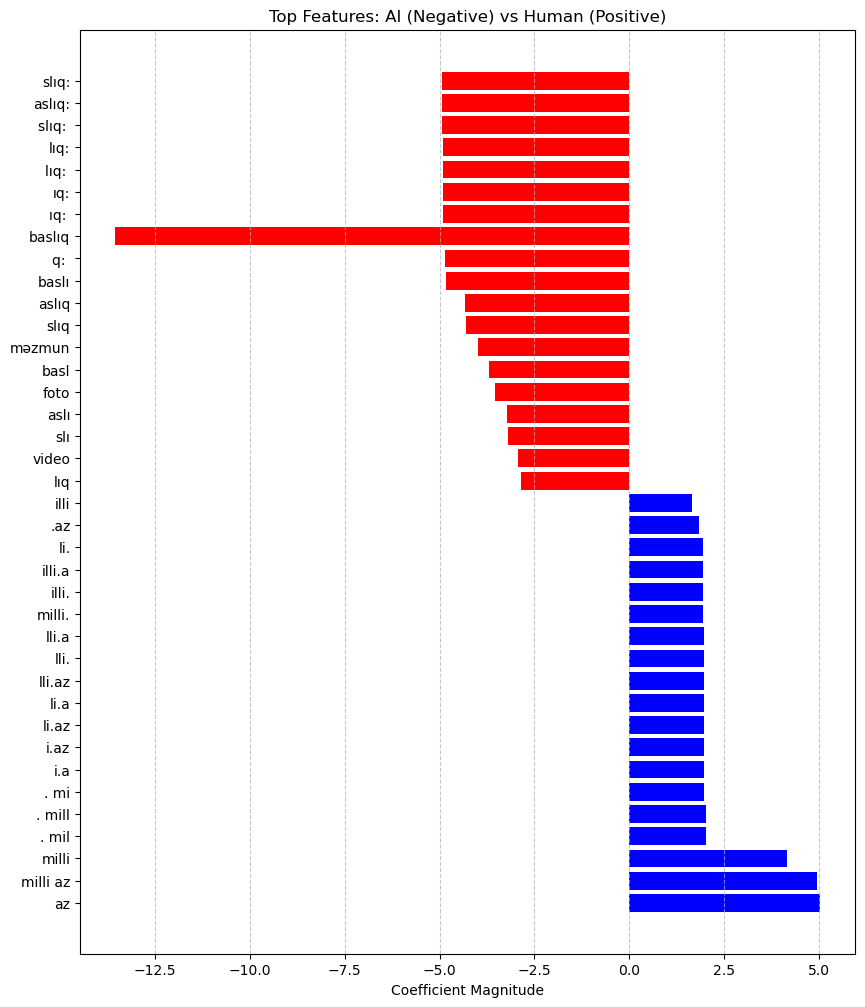

In [36]:
import numpy as np

# 1. Get feature names from both vectorizers
word_feature_names = word_vectorizer.get_feature_names_out()
char_feature_names = char_vectorizer.get_feature_names_out()

# 2. Combine them (must be the same order as your hstack: word then char)
all_feature_names = np.concatenate([word_feature_names, char_feature_names])

# 3. Get the coefficients from the SVM
# Note: This works for Linear SVC or SVC with a linear kernel
if hasattr(svm_model, "coef_"):
    # If it's a sparse matrix, convert to array and flatten
    coefficients = svm_model.coef_.toarray().flatten() if hasattr(svm_model.coef_, "toarray") else svm_model.coef_.flatten()
    
    # 4. Create a DataFrame for easy sorting
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': coefficients
    })

    # 5. Sort by coefficient value
    # Top positive values = Features indicating one class (e.g., Human)
    # Top negative values = Features indicating the other class (e.g., AI)
    feature_importance = feature_importance.sort_values(by='coefficient', ascending=False)

    # 6. Plot the Top 20 for each side
    top_human = feature_importance.head(20)
    top_ai = feature_importance.tail(20)
    plot_data = pd.concat([top_human, top_ai])

    plt.figure(figsize=(10, 12))
    colors = ['red' if c < 0 else 'blue' for c in plot_data['coefficient']]
    plt.barh(plot_data['feature'], plot_data['coefficient'], color=colors)
    plt.xlabel("Coefficient Magnitude")
    plt.title("Top Features: AI (Negative) vs Human (Positive)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The SVM model does not have a 'coef_' attribute. Ensure you are using a linear kernel.")

In [34]:
def predict_text_origin(text):
    word_features = word_vectorizer.transform([text])
    char_features = char_vectorizer.transform([text])
    combined_features = hstack([word_features, char_features])
    prediction = svm_model.predict(combined_features)
    return prediction[0]

def display_prediction_contributions(text):
    word_features = word_vectorizer.transform([text])
    char_features = char_vectorizer.transform([text])
    combined_features = hstack([word_features, char_features])

    prediction = svm_model.predict(combined_features)
    
    if hasattr(svm_model, "coef_"):
        coefficients = svm_model.coef_.toarray().flatten() if hasattr(svm_model.coef_, "toarray") else svm_model.coef_.flatten()
        
        feature_names = np.concatenate([word_vectorizer.get_feature_names_out(), char_vectorizer.get_feature_names_out()])
        
        text_feature_indices = combined_features.nonzero()[1]
        contributions = {feature_names[i]: coefficients[i] for i in text_feature_indices}


        # Sorted contributions as tupple
        sorted_contributions = sorted(contributions.items(), key=lambda item: item[1], reverse=True)
        
        return prediction, sorted_contributions
    else:
        print("The SVM model does not have a 'coef_' attribute. Cannot display contributions.")
        return prediction, None

# Example usage
sample_text = human_text_ai
pred, contrib = display_prediction_contributions(sample_text)
print(f"Prediction: {pred}")
print("Feature contributions:")
pprint(contrib)

Prediction: [1]
Feature contributions:
[('az', np.float64(5.021081802701302)),
 ('illi', np.float64(1.6566941764315581)),
 ('mill', np.float64(1.6450537985645013)),
 ('lli', np.float64(1.5577361786947088)),
 ('. m', np.float64(1.5156625490240714)),
 ('ill', np.float64(1.4904781047261884)),
 ('mil', np.float64(1.4658331717540878)),
 ('o', np.float64(1.1943220963232029)),
 ('ki', np.float64(1.1053540750611377)),
 ('nə', np.float64(1.0675579301607585)),
 ('r. m', np.float64(1.0348771937804093)),
 ('b. m', np.float64(0.8599421034930592)),
 ('2', np.float64(0.8099264982452976)),
 ('ki bu', np.float64(0.7206958976659723)),
 ('ıb. m', np.float64(0.567870792673504)),
 ('ıb.', np.float64(0.5253253896958688)),
 ('ir. m', np.float64(0.48825901063136967)),
 ('bun', np.float64(0.4833184329699543)),
 ('ki,', np.float64(0.4748421949074518)),
 ('irm', np.float64(0.46813857375280776)),
 ('birində', np.float64(0.4678783153325917)),
 ('mir', np.float64(0.4669118185361028)),
 (', y', np.float64(0.46223168

In [37]:
# For a specific sample (ai_full_vec)
sample_array = ai_full_vec.toarray().flatten()
contribution = sample_array * coefficients

# Get features present in this sample with the highest impact
sample_features = pd.DataFrame({
    'feature': all_feature_names,
    'impact': contribution
}).sort_values(by='impact', key=abs, ascending=False)

print("Top features contributing to this specific prediction:")
print(sample_features.head(10))

Top features contributing to this specific prediction:
          feature    impact
3210           bu -0.070218
5317        edici -0.052620
11990           o  0.052571
7980          ilə -0.042320
15624      səbəbi -0.040698
4704       diqqət -0.036506
17715       virus  0.036395
17789          və -0.032965
8872       itirib -0.028836
19859  ərəfəsində -0.025824


In [38]:
human_full_vec =  hstack([word_vectorizer.transform([human_text_sample]), char_vectorizer.transform([human_text_sample])])

In [39]:
# For a specific sample (ai_full_vec)
sample_array = human_full_vec.toarray().flatten()
contribution = sample_array * coefficients

# Get features present in this sample with the highest impact
sample_features = pd.DataFrame({
    'feature': all_feature_names,
    'impact': contribution
}).sort_values(by='impact', key=abs, ascending=False)

print("Top features contributing to this specific prediction:")
print(sample_features.head(10))

Top features contributing to this specific prediction:
           feature    impact
1890            az  0.203638
10263     milli az  0.165570
20061           -  -0.137444
10258        milli  0.132515
23585         " -  -0.067170
13              00  0.066414
23584          " - -0.050023
10126        match  0.045563
2656          bein  0.042904
2657   bein sports  0.042904
